In [2]:
#This doc is aim to explorate the data and find the corelation, there are other EDA document name project-akshay
import pandas as pd
import numpy as np

In [3]:
df = pd.read_json('new_cleaned.json',lines=True)
# load cleaned twitter

In [4]:
# load price data, scrap mathc time period data
price = pd.read_csv('prices_bitcoin.csv')
price = price.drop('Unnamed: 0',axis = 1)
price = price.drop('Open',axis = 1)
import time,datetime
price.Date = pd.to_datetime(price.Date)
price = price[(price['Date'] < datetime.datetime(2018,1,1)) & (price['Date'] > datetime.datetime(2014,12,31))]
price = price.reset_index(drop = True)

In [96]:
# another price data with all date, for later use
pricea = pd.read_csv('prices_bitcoin.csv')
pricea = pricea.drop('Unnamed: 0',axis = 1)
pricea = pricea.drop('Open',axis = 1)
import time,datetime
pricea.Date = pd.to_datetime(pricea.Date)
pricea = pricea[(pricea['Date'] < datetime.datetime(2018,3,1)) & (pricea['Date'] > datetime.datetime(2014,12,1))]
pricea = pricea.reset_index(drop = True)
pricea.Volume = pricea.Volume.apply(lambda x: int(x.replace(',','')))
pricea.Close = pricea.Close.apply(lambda x: float(x.replace(',','')))

In [6]:
price

,Date,High,Low,Close,Volume,Market Cap
0,2017-12-31,"14,377.40","12,755.60","14,156.40","12,136,300,000","216,326,000,000"
1,2017-12-30,"14,681.90","12,350.10","12,952.20","14,452,600,000","246,224,000,000"
2,2017-12-29,"15,279.00","14,307.00","14,656.20","13,025,500,000","246,428,000,000"
3,2017-12-28,"15,888.40","13,937.30","14,606.50","12,336,500,000","265,988,000,000"
4,2017-12-27,"16,930.90","15,114.30","15,838.50","12,487,600,000","270,976,000,000"
5,2017-12-26,"16,461.20","14,028.90","16,099.80","13,454,300,000","235,294,000,000"
6,2017-12-25,"14,593.00","13,448.90","14,026.60","10,664,700,000","234,590,000,000"
7,2017-12-24,"14,626.00","12,747.70","13,925.80","11,572,300,000","244,824,000,000"
8,2017-12-23,"15,603.20","13,828.80","14,699.20","13,086,000,000","233,748,000,000"
9,2017-12-22,"15,943.40","11,833.00","13,831.80","22,198,000,000","266,381,000,000"


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
#convert the  str data columns
price.Volume = price.Volume.apply(lambda x: int(x.replace(',','')))
price.High = price.High.apply(lambda x: float(x.replace(',','')))
price.Low = price.Low.apply(lambda x: float(x.replace(',','')))
price.Close = price.Close.apply(lambda x: float(x.replace(',','')))

In [9]:
#revers data
price = price.iloc[::-1]

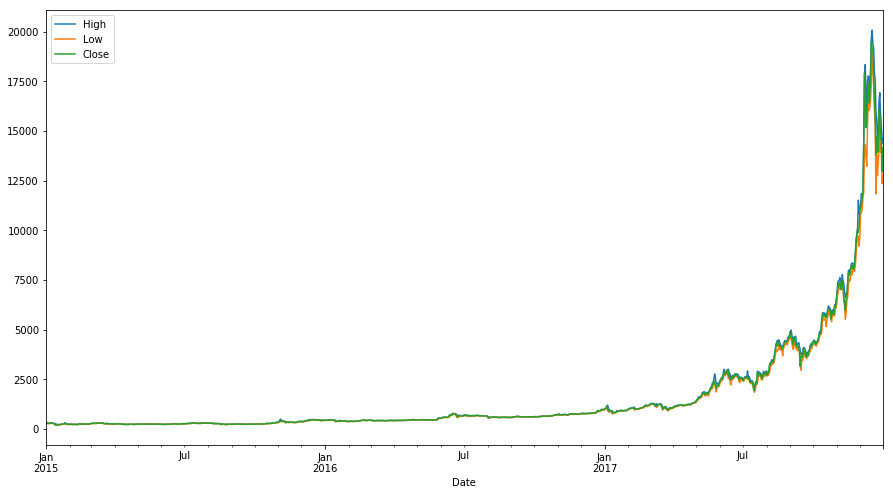

In [10]:
price.plot(x = 'Date', y = ['High','Low','Close'],figsize=(15,8))

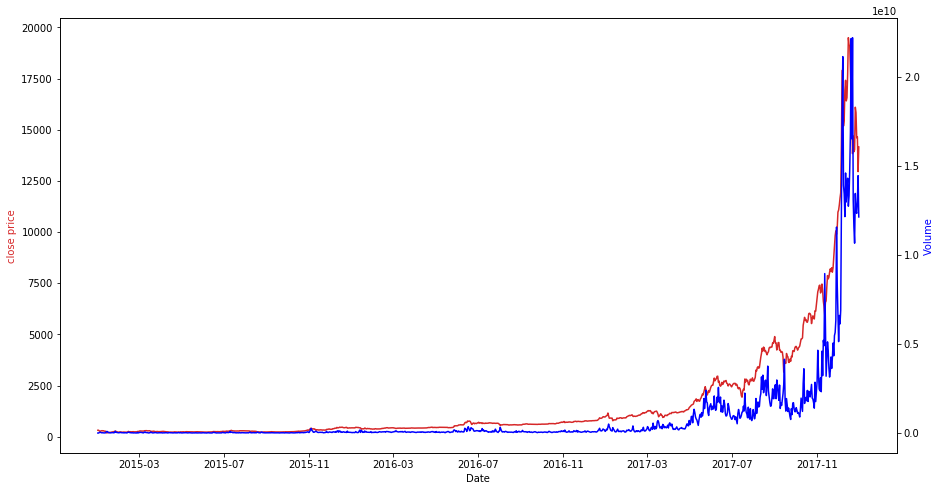

In [11]:
# the price is correlated the transaction Volumes, and that represent the market
fig, ax1 = plt.subplots(figsize=(15,8))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('close price', color=color)
ax1.plot(price.Date, price.Close, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('Volume', color='blue')  # we already handled the x-label with ax1
ax2.plot(price.Date, price.Volume, color='blue')
plt.show()

In [12]:
#vader sentiment analysis, this approach is good at handling text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for i, row in df.T.iteritems():
    try:
        sentence = df.loc[i, 'text']
        ss = sia.polarity_scores(sentence)
        df.set_value(i, 'compound', ss['compound'])
        df.set_value(i, 'neg', ss['neg'])
        df.set_value(i, 'pos', ss['pos'])
    except TypeError:
        print(df.loc[i, 'text'])
        print(i)

In [13]:
#drop useless
df = df.drop(['_id','language'],axis = 1)

In [14]:
df.time = pd.to_datetime(df.time)


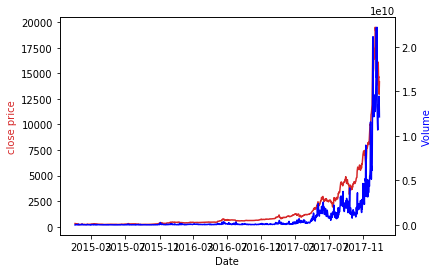

In [15]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('close price', color=color)
ax1.plot(price.Date, price.Close, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('Volume', color='blue')  # we already handled the x-label with ax1
ax2.plot(price.Date, price.Volume, color='blue')
plt.show()

In [16]:
#convert the comment and retwitt
def convert(x):
    if x != '' and x.endswith('K') == False:
            return int(x)
    else:
        if x.endswith('K'):
            return float(x.replace('K',''))*1000
        else:
            return 0

In [17]:
df.favorite = df.favorite.apply(convert)
df.reply = df.reply.apply(convert)
df.retweet = df.retweet.apply(convert)

In [18]:
for i, row in df.T.iteritems():
    try:
        df.set_value(i, 'exposure', (df.loc[i,'favorite']+df.loc[i,'reply']+df.loc[i,'retweet'])*df.loc[i,'compound'])
    except TypeError:
        print(df.loc[i, 'time'])
        print(i)

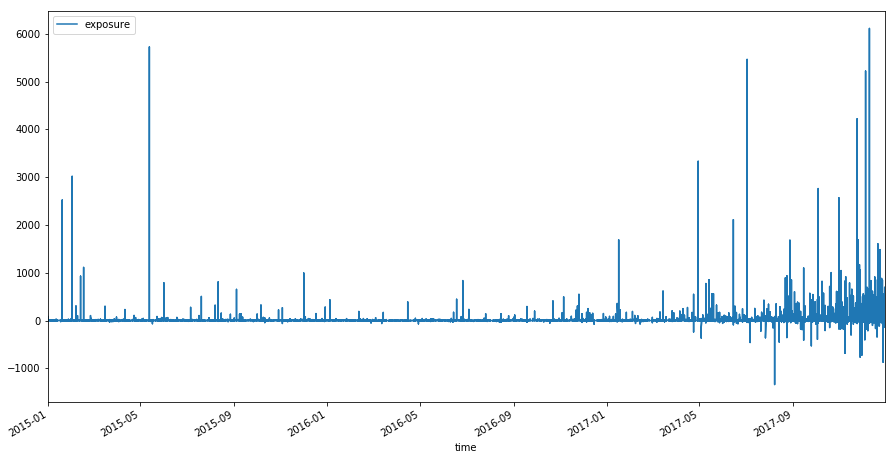

In [19]:
# there exposure means the sentiment with the exposure as a factor to consider
df.plot(x = 'time',y='exposure',figsize = (15,8))

In [21]:
#get the mean value for that day, sentimenti, exposure_senti
from datetime import datetime, timedelta
for d in df.time.unique():
    price.loc[price.Date == d,'compd'] = np.mean(df.loc[df.time == d,'compound'])
    price.loc[price.Date == d,'compd_std'] = np.std(df.loc[df.time == d,'compound'])
    price.loc[price.Date == d,'pos'] = np.mean(df.loc[df.time == d,'pos'])
    price.loc[price.Date == d,'neg'] = np.mean(df.loc[df.time == d,'neg'])
    price.loc[price.Date == d,'exposure_senti'] = np.mean(df.loc[df.time == d,'exposure'])
    price.loc[price.Date == d,'exposure_senti_std'] = np.std(df.loc[df.time == d,'exposure'])
    #price.loc[price.Date == d,'72hrchg'] = float(pricea.loc[pricea.Date == (d + timedelta(days=2)),'Volume'])/float(pricea.loc[pricea.Date == (d + timedelta(days=-1)),'Volume'])-1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
#test
x = datetime(2015,3,2)
x

datetime.datetime(2015, 3, 2, 0, 0)

In [23]:
price.dropna(how='any',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
price.index=price.Date

In [25]:
price

,Date,High,Low,Close,Volume,Market Cap,compd,compd_std,pos,neg,exposure_senti,exposure_senti_std
Date,,,,,,,,,,,,
2015-01-01,2015-01-01,320.44,314.00,314.25,8036550,"4,380,820,000",0.087916,0.393707,0.106226,0.065000,0.951226,2.513266
2015-01-02,2015-01-02,315.84,313.57,315.03,7860650,"4,295,210,000",0.031685,0.287129,0.074444,0.057519,0.043478,0.407187
2015-01-03,2015-01-03,315.15,281.08,281.08,33054400,"4,307,010,000",0.163522,0.422655,0.157135,0.066622,1.306632,3.495506
2015-01-04,2015-01-04,287.23,257.61,264.20,55629100,"3,847,150,000",0.066423,0.401232,0.099767,0.061967,0.192923,1.962490
2015-01-05,2015-01-05,278.34,265.08,274.47,43962800,"3,628,490,000",0.071477,0.246048,0.053692,0.023231,0.609396,1.749690
2015-01-06,2015-01-06,287.55,272.70,286.19,23245700,"3,759,970,000",0.171594,0.283624,0.110719,0.017406,0.481359,1.227489
2015-01-07,2015-01-07,298.75,283.08,294.34,24866800,"3,918,090,000",0.099553,0.404733,0.139133,0.082333,1.086883,2.527069
2015-01-08,2015-01-08,294.14,282.18,283.35,19982500,"4,029,490,000",0.197279,0.386848,0.135034,0.027724,0.441124,1.354147
2015-01-09,2015-01-09,291.11,280.53,290.41,18718600,"3,869,530,000",0.122323,0.290439,0.090077,0.034731,0.838381,3.340407


In [27]:
#use ewma to make the plot smoother
price['ewma_p'] = pd.ewma(price["Close"], span=30, freq="D")
price['ewma_compd'] = pd.ewma(price["compd"], span=30, freq="D")
price['ewma_compdstd'] = pd.ewma(price["compd_std"], span=30, freq="D")
price['ewma_expstd'] = pd.ewma(price["exposure_senti_std"], span=30, freq="D")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: S

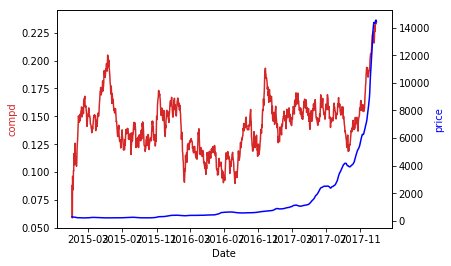

In [28]:
#draw some plot
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('compd', color=color)
ax1.plot(price.Date, price.ewma_compd, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price.Date, price['ewma_p'], color='blue')
plt.show()

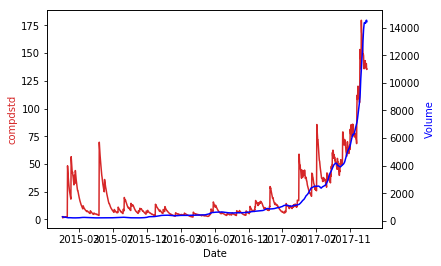

In [29]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('compdstd', color=color)
ax1.plot(price.Date, price.ewma_expstd, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('Volume', color='blue')  # we already handled the x-label with ax1
ax2.plot(price.Date, price['ewma_p'], color='blue')
plt.show()

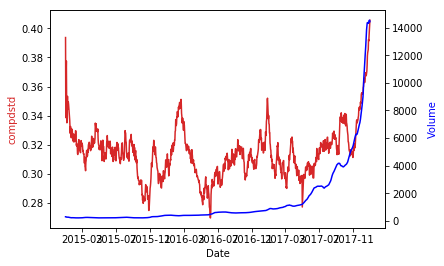

In [30]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('compdstd', color=color)
ax1.plot(price.Date, price.ewma_compdstd, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('Volume', color='blue')  # we already handled the x-label with ax1
ax2.plot(price.Date, price['ewma_p'], color='blue')
plt.show()

In [32]:
# there are some relation between exp_senti and volume, I think if I use better sentiment score it will be better
# so I use google nature processing to label the sentiment score (that needs some fees).
#lets see if it is better
df_paid = pd.read_json('twitter_labeled_bit.json',lines = True)

In [33]:
df_paid.time = pd.to_datetime(df_paid.time)

In [34]:
df2 = df.copy()

In [35]:
df_paid = df_paid.drop(['magnitude','text','polarity'],axis = 1)

In [36]:
df_paid

,favorite,reply,retweet,score,time
0,,,,-0.7,2016-12-30
1,,,,0.1,2016-12-30
2,,,,0.0,2016-12-30
3,1,,1,0.1,2016-12-30
4,88,,70,0.6,2016-12-30
5,1,,2,0.8,2016-12-30
6,1,,,-0.1,2016-12-30
7,,,1,0.0,2016-12-30
8,2,,1,0.5,2016-12-30
9,,,,0.0,2016-12-30


In [37]:
df_paid.reply = df_paid.reply.apply(convert)
df_paid.retweet = df_paid.retweet.apply(convert)

In [43]:
df_paid.favorite = df_paid.favorite.apply(convert)

In [44]:
for i, row in df_paid.T.iteritems():
    try:
        df_paid.set_value(i, 'senti_exp', (df_paid.loc[i,'favorite']+df_paid.loc[i,'reply']+df_paid.loc[i,'retweet'])*df_paid.loc[i,'score'])
    except TypeError:
        print(df.loc[i, 'time'])
        print(i)

In [45]:
df_paid

,favorite,reply,retweet,score,time,senti_exp
0,0.0,0,0.0,-0.7,2016-12-30,-0.000000
1,0.0,0,0.0,0.1,2016-12-30,0.000000
2,0.0,0,0.0,0.0,2016-12-30,0.000000
3,1.0,0,1.0,0.1,2016-12-30,0.200000
4,88.0,0,70.0,0.6,2016-12-30,94.800004
5,1.0,0,2.0,0.8,2016-12-30,2.400000
6,1.0,0,0.0,-0.1,2016-12-30,-0.100000
7,0.0,0,1.0,0.0,2016-12-30,0.000000
8,2.0,0,1.0,0.5,2016-12-30,1.500000
9,0.0,0,0.0,0.0,2016-12-30,0.000000


In [40]:
price2 = price[['Date','Close','Volume']]

In [41]:
price2

,Date,Close,Volume
Date,,,
2015-01-01,2015-01-01,314.25,8036550
2015-01-02,2015-01-02,315.03,7860650
2015-01-03,2015-01-03,281.08,33054400
2015-01-04,2015-01-04,264.20,55629100
2015-01-05,2015-01-05,274.47,43962800
2015-01-06,2015-01-06,286.19,23245700
2015-01-07,2015-01-07,294.34,24866800
2015-01-08,2015-01-08,283.35,19982500
2015-01-09,2015-01-09,290.41,18718600


In [46]:
from datetime import datetime, timedelta
for d in df_paid.time.unique():
    price2.loc[price2.Date == d,'score'] = np.mean(df_paid.loc[df_paid.time == d,'score'])
    price2.loc[price2.Date == d,'score_std'] = np.std(df_paid.loc[df_paid.time == d,'score'])
    price2.loc[price2.Date == d,'exp_senti'] = np.mean(df_paid.loc[df_paid.time == d,'senti_exp'])
    price2.loc[price2.Date == d,'exp_senti_std'] = np.std(df_paid.loc[df_paid.time == d,'senti_exp'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [47]:
price2['ewma_p'] = pd.ewma(price2["Close"], span=30, freq="D")
price2['ewma_score'] = pd.ewma(price2["score"], span=30, freq="D")
price2['ewma_scorestd'] = pd.ewma(price2["score_std"], span=30, freq="D")
price2['ewma_exp_senti'] = pd.ewma(price2["exp_senti"], span=30, freq="D")
price2['ewma_expsstd'] = pd.ewma(price2["exp_senti_std"], span=30, freq="D")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_l

In [48]:
price2

,Date,Close,Volume,score,score_std,exp_senti,exp_senti_std,ewma_p,ewma_score,ewma_scorestd,ewma_exp_senti,ewma_expsstd
Date,,,,,,,,,,,,
2015-01-01,2015-01-01,314.25,8036550,0.159375,0.402228,0.931250,1.946381,314.250000,0.159375,0.402228,0.931250,1.946381
2015-01-02,2015-01-02,315.03,7860650,-0.006897,0.352265,0.010345,2.320574,314.653000,0.073468,0.376413,0.455449,2.139714
2015-01-03,2015-01-03,281.08,33054400,0.205263,0.291048,1.302632,2.544187,302.707923,0.120360,0.346041,0.756872,2.283623
2015-01-04,2015-01-04,264.20,55629100,-0.021212,0.340016,-0.075758,0.869702,292.097587,0.081352,0.344381,0.527452,1.894036
2015-01-05,2015-01-05,274.47,43962800,0.003846,0.334527,0.215385,2.234639,288.086884,0.063717,0.342139,0.456449,1.971532
2015-01-06,2015-01-06,286.19,23245700,0.100000,0.329884,0.126471,1.183790,287.715789,0.070815,0.339741,0.391894,1.817422
2015-01-07,2015-01-07,294.34,24866800,0.035484,0.428462,0.751613,2.462214,288.861489,0.064705,0.355086,0.454110,1.928943
2015-01-08,2015-01-08,283.35,19982500,0.158065,0.449210,0.387097,1.753106,288.001499,0.079272,0.369773,0.443653,1.901506
2015-01-09,2015-01-09,290.41,18718600,0.133333,0.346410,64.248151,322.822413,288.345801,0.087000,0.366433,9.564691,47.778081


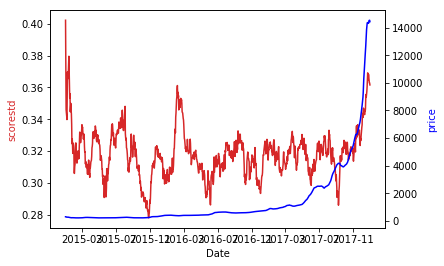

In [49]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('scorestd', color=color)
ax1.plot(price2.Date, price2.ewma_scorestd, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price2.Date, price2['ewma_p'], color='blue')
plt.show()

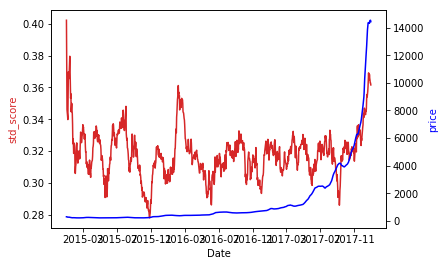

In [50]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('std_score', color=color)
ax1.plot(price2.Date, price2.ewma_scorestd, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price2.Date, price2['ewma_p'], color='blue')
plt.show()

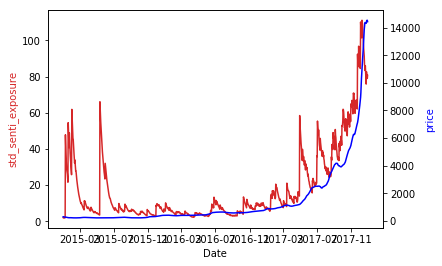

In [51]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('std_senti_exposure', color=color)
ax1.plot(price2.Date, price2.ewma_expsstd, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price2.Date, price2['ewma_p'], color='blue')
plt.show()

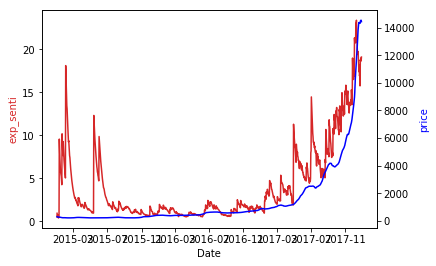

In [52]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('exp_senti', color=color)
ax1.plot(price2.Date, price2.ewma_exp_senti, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price2.Date, price2['ewma_p'], color='blue')
plt.show()

In [53]:
price2.loc[x,:]

Date              2015-03-02 00:00:00
Close                          275.67
Volume                       40465700
score                        0.166667
score_std                    0.295077
exp_senti                     1.35455
exp_senti_std                 3.22331
ewma_p                        242.357
ewma_score                   0.103967
ewma_scorestd                0.333784
ewma_exp_senti                3.25063
ewma_expsstd                  11.9285
Name: 2015-03-02 00:00:00, dtype: object

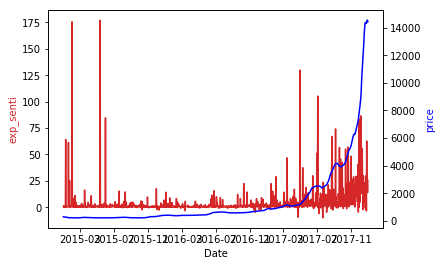

In [54]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('exp_senti', color=color)
ax1.plot(price2.Date, price2.exp_senti, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price2.Date, price2['ewma_p'], color='blue')
plt.show()

In [55]:
#it is obviously that google NLP is better than vader
#but still some abnormal high at some days at 2015.
#there are couple day in 2015 the exposure_sentiment is too high lets find out what happend that day

In [56]:
df_paid.loc[df_paid.time == datetime(2015,5,17)]

,favorite,reply,retweet,score,time,senti_exp
17782,12.0,0,200.0,-0.4,2015-05-17,-84.800001
17783,2.0,0,0.0,0.8,2015-05-17,1.600000
17784,2.0,0,0.0,0.1,2015-05-17,0.200000
17785,1.0,1,0.0,-0.8,2015-05-17,-1.600000
17786,0.0,0,3.0,-0.1,2015-05-17,-0.300000
17787,2.0,0,1.0,0.2,2015-05-17,0.600000
17788,0.0,1,0.0,0.2,2015-05-17,0.200000
17789,0.0,0,0.0,0.0,2015-05-17,0.000000
17790,1.0,0,1.0,0.0,2015-05-17,0.000000
17791,2.0,0,2.0,0.4,2015-05-17,1.600000


In [57]:
df_paid.loc[df_paid.time == datetime(2015,5,13)]

,favorite,reply,retweet,score,time,senti_exp
17891,2.0,0,6.0,0.1,2015-05-13,0.800000
17892,0.0,0,1.0,0.7,2015-05-13,0.700000
17893,0.0,0,0.0,0.0,2015-05-13,0.000000
17894,2.0,0,1.0,0.1,2015-05-13,0.300000
17895,1.0,0,0.0,-0.2,2015-05-13,-0.200000
17896,2.0,1,1.0,0.7,2015-05-13,2.800000
17897,1.0,0,1.0,0.0,2015-05-13,0.000000
17898,0.0,0,0.0,0.8,2015-05-13,0.000000
17899,3.0,1,1.0,0.1,2015-05-13,0.500000
17900,1.0,0,1.0,0.0,2015-05-13,0.000000


In [58]:
df_paid.loc[df_paid.time == datetime(2015,2,1)]

,favorite,reply,retweet,score,time,senti_exp
20680,0.0,0,0.0,0.0,2015-02-01,0.000000
20681,0.0,0,0.0,0.0,2015-02-01,0.000000
20682,0.0,0,0.0,0.1,2015-02-01,0.000000
20683,0.0,0,0.0,NaN,2015-02-01,NaN
20684,0.0,0,1.0,0.2,2015-02-01,0.200000
20685,0.0,0,1.0,-0.2,2015-02-01,-0.200000
20686,0.0,0,0.0,0.1,2015-02-01,0.000000
20687,0.0,0,1.0,-0.2,2015-02-01,-0.200000
20688,0.0,0,0.0,0.1,2015-02-01,0.000000
20689,1.0,0,0.0,NaN,2015-02-01,NaN


In [59]:
# find out these  twitter very high retweet but rare reply, it is robot or it is fake twitter
# at 2015 the bitcoin barely known by people, some people just spam the twitter to get more exposure, to make bitcoin popular
# also some are not really related to bitcoin but get very high favorite.

In [60]:
fakedata = df_paid.loc[df_paid.retweet > 4000].loc[df_paid.reply < 30]
fakedata

,favorite,reply,retweet,score,time,senti_exp
2206,233.0,11,8300.0,0.1,2016-10-10,854.400013
17902,0.0,0,7000.0,0.8,2015-05-13,5600.000083
20747,3200.0,2,4700.0,0.2,2015-02-01,1580.400024
21034,1400.0,5,6000.0,0.1,2015-01-23,740.500011
21141,1500.0,4,5100.0,0.3,2015-01-19,1981.200079
21249,2200.0,3,5300.0,0.3,2015-01-15,2250.900089
23884,47.0,3,5800.0,-0.3,2017-11-24,-1755.000070
29037,7200.0,7,7100.0,0.1,2017-07-03,1430.700021
30848,39.0,0,4400.0,0.8,2017-04-30,3551.200053


In [61]:
fakedata.index

Int64Index([2206, 17902, 20747, 21034, 21141, 21249, 23884, 29037, 30848], dtype='int64')

In [62]:
#drop fakedata
df_paid2 = df_paid.drop(fakedata.index)

In [63]:
#run above price2 processing again get new price3
price3 = price[['Date','Close','Volume']]

In [64]:
for d in df_paid2.time.unique():
    price3.loc[price3.Date == d,'score'] = np.mean(df_paid2.loc[df_paid2.time == d,'score'])
    price3.loc[price3.Date == d,'score_std'] = np.std(df_paid2.loc[df_paid2.time == d,'score'])
    price3.loc[price3.Date == d,'exp_senti'] = np.mean(df_paid2.loc[df_paid2.time == d,'senti_exp'])
    price3.loc[price3.Date == d,'exp_senti_std'] = np.std(df_paid2.loc[df_paid2.time == d,'senti_exp'])
price3['ewma_p'] = pd.ewma(price3["Close"], span=30, freq="D")
price3['ewma_score'] = pd.ewma(price3["score"], span=30, freq="D")
price3['ewma_scorestd'] = pd.ewma(price3["score_std"], span=30, freq="D")
price3['ewma_exp_senti'] = pd.ewma(price3["exp_senti"], span=30, freq="D")
price3['ewma_expsstd'] = pd.ewma(price3["exp_senti_std"], span=30, freq="D")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=30,min_periods=0,freq=D,adjust=True,ignore_na=False).mean(

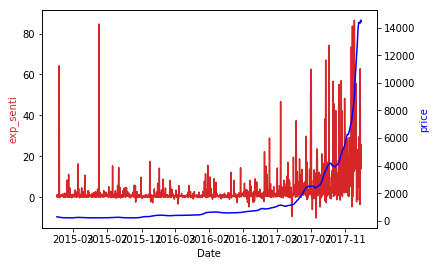

In [65]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('exp_senti', color=color)
ax1.plot(price3.Date, price3.exp_senti, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price3.Date, price3['ewma_p'], color='blue')
plt.show()

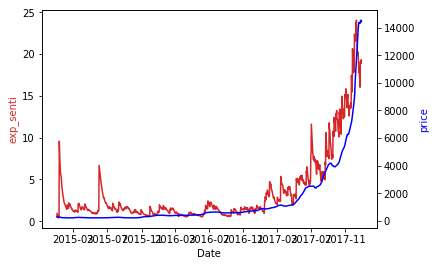

In [66]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('exp_senti', color=color)
ax1.plot(price3.Date, price3.ewma_exp_senti, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price3.Date, price3['ewma_p'], color='blue')
plt.show()

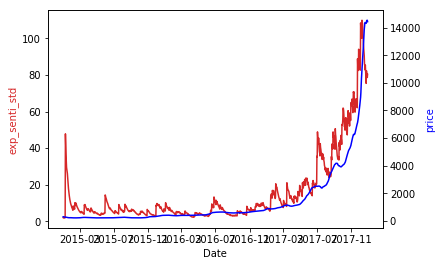

In [67]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('exp_senti_std', color=color)
ax1.plot(price3.Date, price3.ewma_expsstd, color=color)
ax2 = ax1.twinx()

ax2.set_ylabel('price', color='blue')  # we already handled the x-label with ax1
ax2.plot(price3.Date, price3['ewma_p'], color='blue')
plt.show()

In [68]:
price3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1077 entries, 2015-01-01 to 2017-12-30
Data columns (total 12 columns):
Date              1077 non-null datetime64[ns]
Close             1077 non-null float64
Volume            1077 non-null int64
score             1076 non-null float64
score_std         1076 non-null float64
exp_senti         1076 non-null float64
exp_senti_std     1076 non-null float64
ewma_p            1077 non-null float64
ewma_score        1077 non-null float64
ewma_scorestd     1077 non-null float64
ewma_exp_senti    1077 non-null float64
ewma_expsstd      1077 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 149.4 KB


In [69]:
# use corr() to see something
corr_matrix = price3.corr()
corr_matrix["Volume"].sort_values(ascending=False)

Volume            1.000000
Close             0.935293
ewma_p            0.920334
ewma_expsstd      0.816058
ewma_exp_senti    0.810464
exp_senti_std     0.399616
exp_senti         0.382006
ewma_scorestd     0.375558
score_std         0.156473
ewma_score       -0.001361
score            -0.004539
Name: Volume, dtype: float64

In [139]:
for t in price3.Date:
    price3.loc[price3.Date == t,'1d_p'] = float(pricea.loc[pricea.Date == (t + timedelta(days=1)),'Close'])
    price3.loc[price3.Date == t,'3d_p'] = float(pricea.loc[pricea.Date == (t + timedelta(days=3)),'Close'])
    price3.loc[price3.Date == t,'10d_p'] = float(pricea.loc[pricea.Date == (t + timedelta(days=10)),'Close'])
    price3.loc[price3.Date == t,'20d_p'] = float(pricea.loc[pricea.Date == (t + timedelta(days=20)),'Close'])
    price3.loc[price3.Date == t,'30d_p'] = float(pricea.loc[pricea.Date == (t + timedelta(days=30)),'Close'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [140]:
price3

,Date,Close,Volume,score,score_std,exp_senti,exp_senti_std,ewma_p,ewma_score,ewma_scorestd,ewma_exp_senti,ewma_expsstd,1d_p,3d_p,10d_p,20d_p,30d_p
0,2015-01-01,314.25,8036550,0.159375,0.402228,0.931250,1.946381,314.250000,0.159375,0.402228,0.931250,1.946381,315.03,264.20,265.66,226.90,217.46
1,2015-01-02,315.03,7860650,-0.006897,0.352265,0.010345,2.320574,314.653000,0.073468,0.376413,0.455449,2.139714,281.08,274.47,267.80,233.41,226.97
2,2015-01-03,281.08,33054400,0.205263,0.291048,1.302632,2.544187,302.707923,0.120360,0.346041,0.756872,2.283623,264.20,286.19,225.86,232.88,238.23
3,2015-01-04,264.20,55629100,-0.021212,0.340016,-0.075758,0.869702,292.097587,0.081352,0.344381,0.527452,1.894036,274.47,294.34,178.10,247.85,227.27
4,2015-01-05,274.47,43962800,0.003846,0.334527,0.215385,2.234639,288.086884,0.063717,0.342139,0.456449,1.971532,286.19,283.35,209.84,253.72,226.85
5,2015-01-06,286.19,23245700,0.100000,0.329884,0.126471,1.183790,287.715789,0.070815,0.339741,0.391894,1.817422,294.34,290.41,208.10,273.47,217.11
6,2015-01-07,294.34,24866800,0.035484,0.428462,0.751613,2.462214,288.861489,0.064705,0.355086,0.454110,1.928943,283.35,274.80,199.26,263.48,222.27
7,2015-01-08,283.35,19982500,0.158065,0.449210,0.387097,1.753106,288.001499,0.079272,0.369773,0.443653,1.901506,290.41,265.66,210.34,233.92,227.75
8,2015-01-09,290.41,18718600,0.133333,0.346410,64.248151,322.822413,288.345801,0.087000,0.366433,9.564691,47.778081,274.80,267.80,214.86,233.51,223.41
9,2015-01-10,274.80,15264300,0.003448,0.359581,-0.220690,0.950999,286.550228,0.075925,0.365525,8.267584,41.570886,265.66,225.86,211.32,226.43,220.11


In [142]:
corr_matrix = price3.corr()
corr_matrix["1d_p"].sort_values(ascending=False)

1d_p              1.000000
Close             0.996756
3d_p              0.992809
ewma_p            0.981430
10d_p             0.974869
20d_p             0.941383
ewma_expsstd      0.934714
ewma_exp_senti    0.928837
Volume            0.928553
30d_p             0.899912
exp_senti_std     0.495297
exp_senti         0.465092
ewma_scorestd     0.342727
score_std         0.142273
ewma_score        0.033666
score             0.016650
Name: 1d_p, dtype: float64

In [137]:
corr_matrix["3d_p"].sort_values(ascending=False)

3d_p              1.000000
1d_p              0.992809
Close             0.989382
10d_p             0.978782
ewma_p            0.975615
ewma_expsstd      0.937849
ewma_exp_senti    0.931028
Volume            0.917368
exp_senti_std     0.503011
exp_senti         0.468922
ewma_scorestd     0.340219
score_std         0.136476
ewma_score        0.028021
score             0.013486
Name: 3d_p, dtype: float64

In [138]:
corr_matrix["10d_p"].sort_values(ascending=False)

10d_p             1.000000
3d_p              0.978782
1d_p              0.974869
Close             0.971611
ewma_p            0.961024
ewma_expsstd      0.940523
ewma_exp_senti    0.931012
Volume            0.890079
exp_senti_std     0.518480
exp_senti         0.485613
ewma_scorestd     0.337634
score_std         0.135983
ewma_score        0.012584
score             0.007133
Name: 10d_p, dtype: float64

In [143]:
corr_matrix["20d_p"].sort_values(ascending=False)

20d_p             1.000000
30d_p             0.968380
10d_p             0.968190
3d_p              0.945647
1d_p              0.941383
Close             0.938040
ewma_expsstd      0.937592
ewma_p            0.931138
ewma_exp_senti    0.925035
Volume            0.831762
exp_senti_std     0.513607
exp_senti         0.476045
ewma_scorestd     0.313083
score_std         0.131404
ewma_score        0.002577
score             0.000870
Name: 20d_p, dtype: float64

In [145]:
# 10 days prediction is most correlated with the senti-exposure and it's std
full_set = price3.copy()

In [147]:
full_set = full_set[['Date','Close','10d_p','Volume','exp_senti','exp_senti_std']]

In [149]:
full_set.to_json('full_set.json')